# Importing Libraries

In [1186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1187]:
df0 = pd.read_csv('dataset.csv')

# Analysing Data

In [1188]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [1189]:
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [1190]:
df0.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Checking for the null values

In [1191]:
(df0.isnull().sum()/5110)*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

#### Correlation

In [1192]:
df0.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<AxesSubplot:>

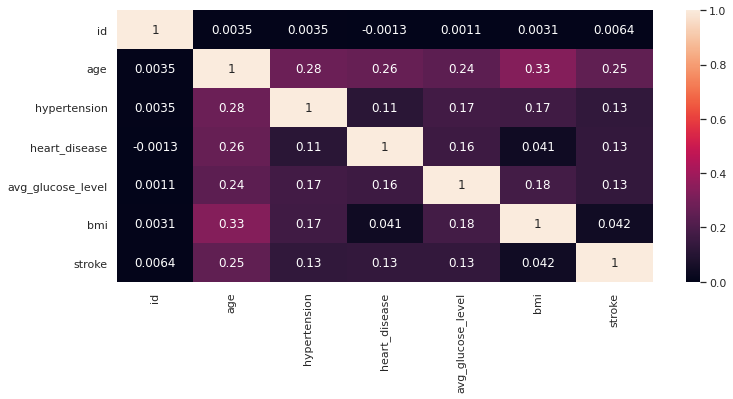

In [1193]:
plt.figure(figsize=(12,5))
sns.heatmap(df0.corr(), annot=True)

# Data Cleaning

## BMI column

<AxesSubplot:xlabel='bmi', ylabel='Count'>

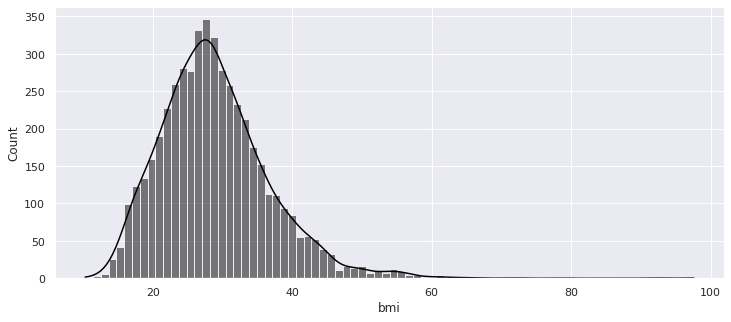

In [1194]:
plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid')
sns.histplot(df0.bmi,kde=True,color='black')

#### Relacing the missing values with mean

In [1195]:
bmi_avg = df0.bmi.mean()

In [1196]:
df0.fillna(bmi_avg,inplace=True)

#### Removing outlier using standard deviation with 3 STD as input range

In [1197]:
upper_limit_bmi = df0.bmi.mean()+ 3 * df0.bmi.std()
lower_limit_bmi = df0.bmi.mean()- 3 * df0.bmi.std()
df1 = df0[(df0.bmi<upper_limit_bmi) & (df0.bmi>lower_limit_bmi)]

In [1198]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<AxesSubplot:xlabel='bmi', ylabel='Count'>

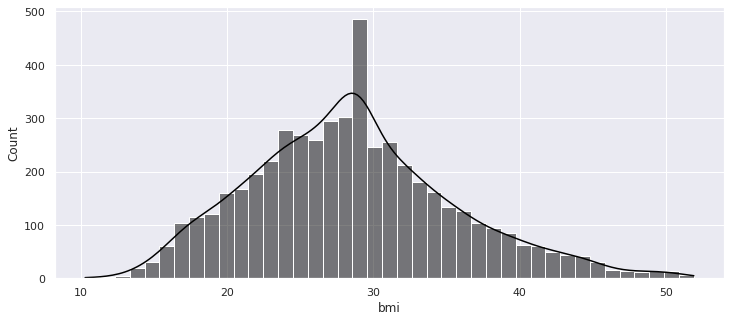

In [1199]:
plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid')
sns.histplot(df1.bmi,kde=True,color='black')

## Gender Column

/home/satwik/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

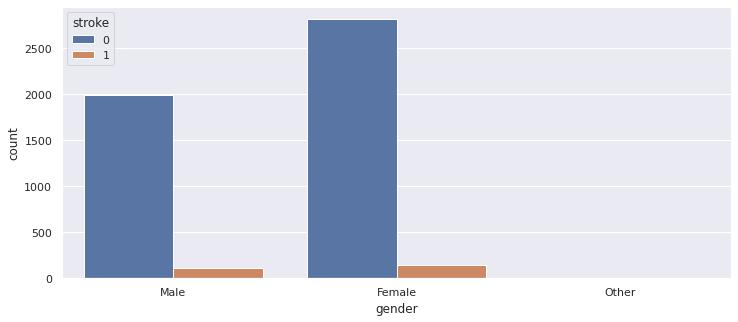

In [1200]:
plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid')
sns.countplot(df1.gender,hue=df1.stroke)

In [1201]:
df1.replace(to_replace='Other',value='Female',inplace=True)

/home/satwik/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [1202]:
df1.gender.value_counts()

Female    2953
Male      2098
Name: gender, dtype: int64

## Age

<AxesSubplot:xlabel='age', ylabel='Count'>

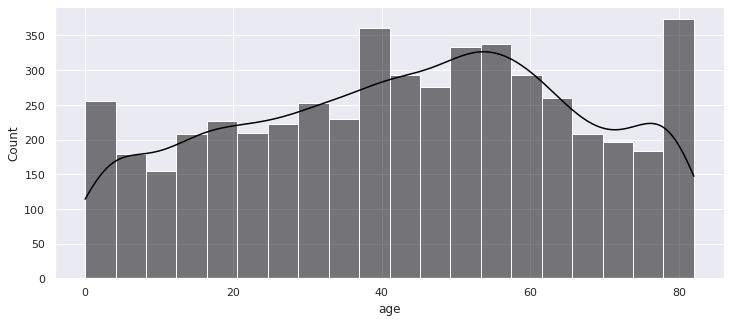

In [1203]:
plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid')
sns.histplot(df1.age,kde=True,color='black')

In [1204]:
df2 = df1[df1.age>1]

In [1205]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<AxesSubplot:xlabel='age', ylabel='Count'>

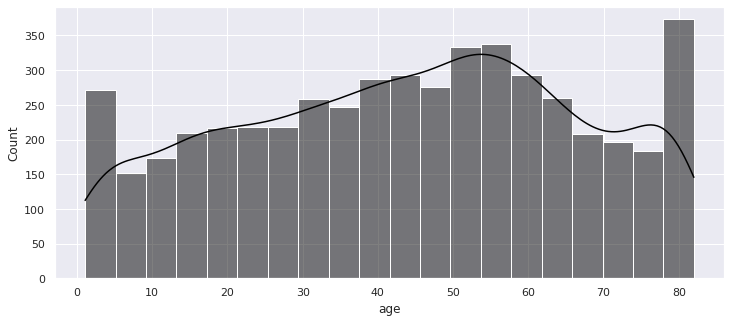

In [1206]:
plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid')
sns.histplot(df2.age,kde=True,color='black')

## Hypertension

/home/satwik/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

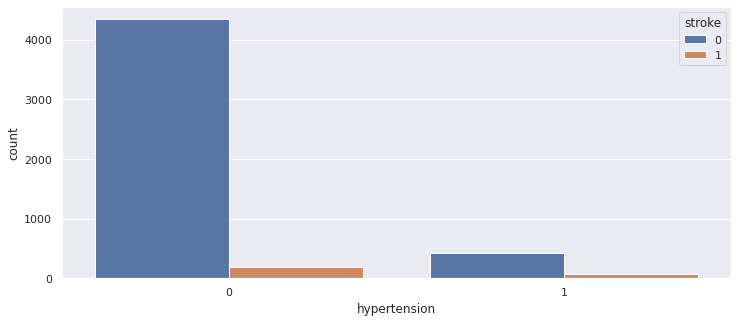

In [1207]:
plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid')
sns.countplot(df2.hypertension,hue=df2.stroke)

## Married

/home/satwik/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

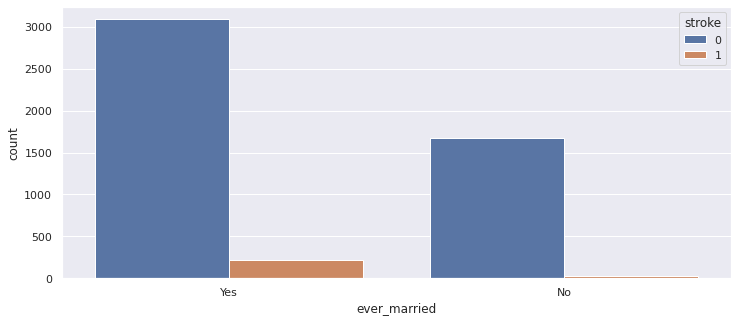

In [1208]:
plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid')
sns.countplot(df2.ever_married,hue=df2.stroke)

## Work-Type

/home/satwik/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

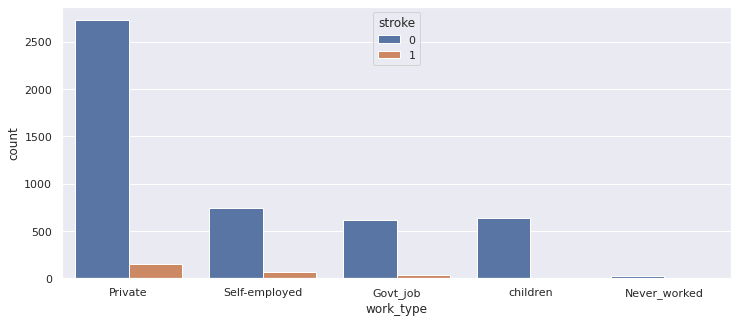

In [1209]:
plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid')
sns.countplot(df2.work_type,hue=df2.stroke)

## Residence

/home/satwik/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

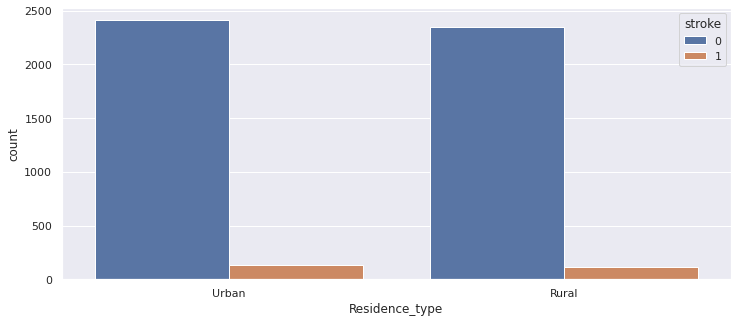

In [1210]:
plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid')
sns.countplot(df2.Residence_type,hue=df2.stroke)

## Average Glucode Level

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

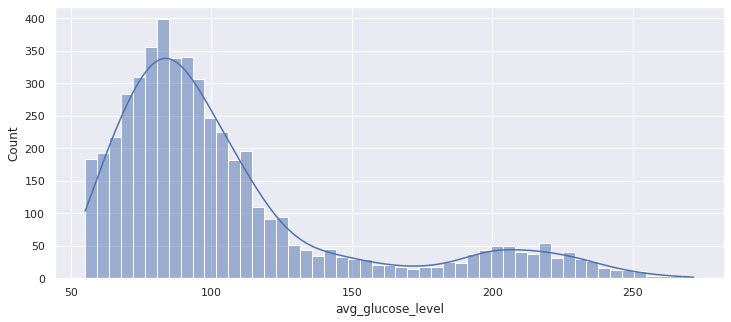

In [1211]:
plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid')
sns.histplot(df2.avg_glucose_level,fill=True,kde=True)

In [1212]:
upper_limit_glu = df2.avg_glucose_level.mean()+ 1 * df2.avg_glucose_level.std()
lower_limit_glu = df2.avg_glucose_level.mean()- 1 * df2.avg_glucose_level.std()
df2 = df2[(df2.avg_glucose_level<upper_limit_glu) & (df2.avg_glucose_level>lower_limit_glu)]

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

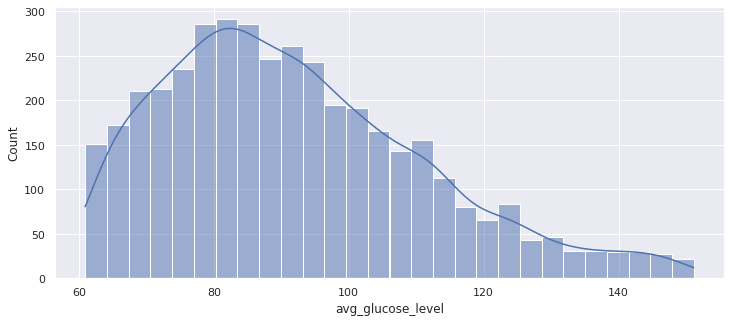

In [1213]:
plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid')
sns.histplot(df2.avg_glucose_level,fill=True,kde=True)

## Smoking Status

In [1214]:
df2.smoking_status.unique()

array(['never smoked', 'Unknown', 'smokes', 'formerly smoked'],
      dtype=object)

/home/satwik/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

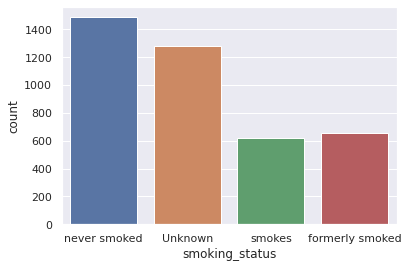

In [1215]:
sns.countplot(df2.smoking_status)

In [1216]:
df2.smoking_status.replace(to_replace='Unknown',value='nan',inplace=True)

In [1217]:
df2.smoking_status.unique()

array(['never smoked', 'nan', 'smokes', 'formerly smoked'], dtype=object)

In [1218]:
df2.smoking_status.describe()

count             4047
unique               4
top       never smoked
freq              1488
Name: smoking_status, dtype: object

In [1219]:
x = df2[df2.smoking_status=='nan'].index

In [1220]:
df2.drop(x,inplace=True)

/home/satwik/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

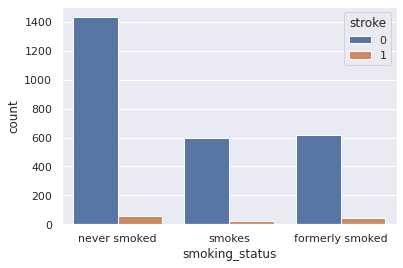

In [1221]:
sns.countplot(df2.smoking_status,hue=df2.stroke)

In [1222]:
df2.stroke.unique()

array([1, 0])

In [1223]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


## Catrgorical Data Handling

In [1224]:
df3 = df2.drop(['id'],axis = 1)

In [1225]:
df3.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [1226]:
df3 = pd.get_dummies(df3, columns=['gender','Residence_type','smoking_status','ever_married','work_type'], drop_first=True)

In [1227]:
df3.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,1,0,0
6,74.0,1,1,70.09,27.4,1,1,0,1,0,1,0,1,0,0
7,69.0,0,0,94.39,22.8,1,0,1,1,0,0,0,1,0,0
10,81.0,1,0,80.43,29.7,1,0,0,1,0,1,0,1,0,0
11,61.0,0,1,120.46,36.8,1,0,0,0,1,1,0,0,0,0


In [1228]:
X = df3.iloc[:,:-1]
y = df3.iloc[:,-1]

# Model Training

In [1229]:
result_list = []

## Train-test-Split

In [1230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

## Scaling Data

In [1231]:
std_scaler  = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

## Logistic Regression Classifier

In [1232]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [1233]:
y_pred = lr.predict(X_test)

In [1165]:
from sklearn.metrics import accuracy_score
result_list.append(accuracy_score(y_test,y_pred)*100)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuaracy-score:{}".format(accuracy_score(y_test,y_pred)))

print((confusion_matrix(y_test,y_pred)))

Accuaracy-score:0.9963898916967509
[[540   2]
 [  0  12]]


## Decision Tree Classifier

In [1166]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [1167]:
dtree_y_pred = classifier.predict(X_test)

In [1168]:
from sklearn.metrics import accuracy_score
result_list.append(accuracy_score(y_test,dtree_y_pred)*100)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuaracy-score:{}".format(accuracy_score(y_test,y_pred)))
print((confusion_matrix(y_test,dtree_y_pred)))

Accuaracy-score:0.9963898916967509
[[540   2]
 [  0  12]]


## Support Vector Machine Classifier

In [1169]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [1170]:
svm_y_pred = classifier_svm.predict(X_test)

In [1171]:
print('Accuracy score for test data is:', accuracy_score(y_test,svm_y_pred))
result_list.append(accuracy_score(y_test,svm_y_pred)*100)

Accuracy score for test data is: 0.9963898916967509


## K-N N classifier

In [1172]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [1173]:
k_y_pred = classifier_knn.predict(X_test)

In [1174]:
print('Accuracy score for test data is:', accuracy_score(y_test,k_y_pred))
result_list.append(accuracy_score(y_test,k_y_pred)*100)

Accuracy score for test data is: 0.9855595667870036


## Naive Bias classifier

In [1175]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [1176]:
nb_y_pred = classifier_nb.predict(X_test)

In [1177]:
print('Accuracy score for test data is:', accuracy_score(y_test,svm_y_pred))
result_list.append(accuracy_score(y_test,svm_y_pred)*100)

Accuracy score for test data is: 0.9963898916967509


## Random Forest

In [1178]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [1179]:
rf_y_pred = classifier_rf.predict(X_test)

In [1180]:
print('accuracy score for test data is:', accuracy_score(y_test,rf_y_pred))

accuracy score for test data is: 0.9945848375451264


In [1181]:
result_list.append(accuracy_score(y_test,svm_y_pred)*100)

<AxesSubplot:>

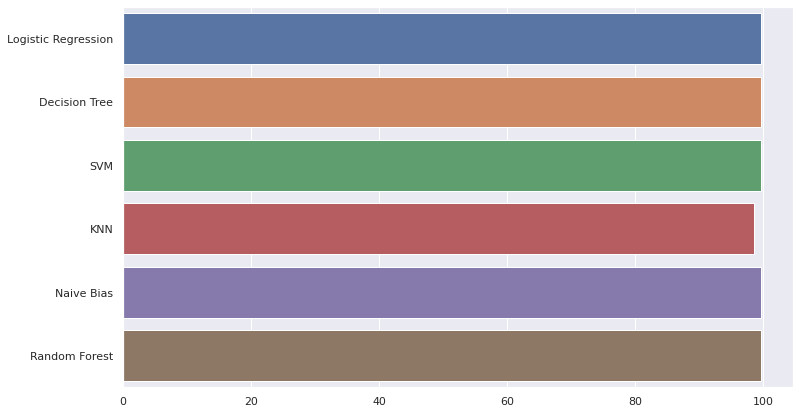

In [1182]:
plt.figure(figsize=(12,7))
sns.barplot(x = result_list, y = ['Logistic Regression','Decision Tree','SVM','KNN','Naive Bias','Random Forest'])

## Conclusion
As we can see Support Vector Machine and Gaussian naive bias gives the best result as compared to the other algorithm.
# Accuracy is 99.63%